In [122]:
import pandas as pd
import numpy as np

In [123]:
df=pd.read_csv('/kaggle/input/churn-dataset/Churn.csv')

In [124]:
df.sample(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2774,2775,15650034,Kudryashova,564,France,Female,28,1,0.00,1,1,1,162428.05,0
7032,7033,15583680,White,615,Spain,Male,41,4,0.00,1,0,1,149278.96,0
4266,4267,15673984,Daniels,536,France,Female,35,8,0.00,1,1,0,171840.24,1
2329,2330,15639415,Thompson,850,France,Male,35,3,162442.35,1,1,0,183566.78,0
3871,3872,15662091,Adams,570,Spain,Male,21,7,116099.82,1,1,1,148087.62,0
4078,4079,15690440,Stiles,656,Spain,Male,47,1,0.00,2,1,1,197961.93,0


In [125]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [126]:
df.head(7)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [127]:
df.value_counts('Geography')

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [128]:
df.value_counts('Gender')

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [129]:
df1=pd.get_dummies(df,drop_first=True)
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [130]:
X=df1.drop('Exited',axis=1)
y=df['Exited']

In [131]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [132]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Train Test Split


In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [134]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,True,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,True,True
6087,561,27,9,135637.00,1,1,0,153080.40,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,False,False,True
5191,682,58,1,0.00,1,1,1,706.50,False,False,False
5390,735,38,1,0.00,3,0,0,92220.12,False,False,False
860,667,43,8,190227.46,1,1,0,97508.04,False,False,True


# Feature Scaling

In [135]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.transform(X_test)

# Deep Learning starts 

In [136]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [137]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))    #hidden layer
model.add(Dense(11,activation='relu'))                 #hidden layer
model.add(Dense(1,activation='sigmoid'))               #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [138]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [140]:
history=model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7164 - loss: 0.5886 - val_accuracy: 0.8062 - val_loss: 0.4718
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.4767 - val_accuracy: 0.8300 - val_loss: 0.4310
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8146 - loss: 0.4427 - val_accuracy: 0.8319 - val_loss: 0.4120
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8283 - loss: 0.4110 - val_accuracy: 0.8394 - val_loss: 0.3978
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8343 - loss: 0.3947 - val_accuracy: 0.8375 - val_loss: 0.3857
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8368 - loss: 0.3848 - val_accuracy: 0.8456 - val_loss: 0.3747
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8435 - loss: 0.3747 - val_accuracy: 0.8481 - val_loss: 0.3651
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8519 - loss: 0.3561 - val_accu

In [141]:
model.layers[0].get_weights()

[array([[-1.10394880e-01, -9.62173343e-02,  2.05936760e-01,
         -1.84164345e-01,  4.08468693e-01,  4.47722264e-02,
          3.85392867e-02, -5.21161743e-02,  2.39158854e-01,
          1.64275050e-01,  4.37122881e-02],
        [-7.00572133e-01, -1.82047322e-01, -7.46454373e-02,
          1.75307766e-01,  5.24312496e-01,  1.43635964e+00,
         -7.86749125e-01,  1.75423443e-01,  2.58096121e-02,
          4.38997030e-01,  1.21950405e-02],
        [-3.11185807e-01,  5.65569066e-02,  2.57420778e-01,
          1.46851927e-01, -2.37200797e-01,  2.64060684e-02,
          9.75739881e-02,  2.62662973e-02, -9.14075300e-02,
          3.68531317e-01,  7.22919882e-04],
        [-3.02193612e-01,  1.01820946e-01, -4.53266680e-01,
         -2.36443758e-01, -2.89085358e-02,  6.81911409e-02,
          5.95107794e-01, -6.84144497e-01,  7.67399609e-01,
          6.20858490e-01, -1.90987185e-01],
        [ 2.24659979e-01,  8.64856899e-01,  2.72320099e-02,
         -7.24451467e-02,  1.79791972e-01,  

In [142]:
y_prob=model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [143]:
y_pred=np.where(y_prob>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.859

In [145]:
history.history

{'accuracy': [0.7618749737739563,
  0.8065624833106995,
  0.8189062476158142,
  0.8265625238418579,
  0.8335937261581421,
  0.83984375,
  0.8456249833106995,
  0.8525000214576721,
  0.8532812595367432,
  0.85546875,
  0.859375,
  0.8573437333106995,
  0.8592187762260437,
  0.8609374761581421,
  0.8610937595367432,
  0.8612499833106995,
  0.8623437285423279,
  0.8617187738418579,
  0.8634374737739563,
  0.8623437285423279,
  0.8615624904632568,
  0.864062488079071,
  0.8629687428474426,
  0.8626562356948853,
  0.8628125190734863,
  0.8645312786102295,
  0.864062488079071,
  0.8626562356948853,
  0.8656250238418579,
  0.8650000095367432,
  0.8646875023841858,
  0.8634374737739563,
  0.8659374713897705,
  0.8643749952316284,
  0.8657812476158142,
  0.8651562333106995,
  0.8668749928474426,
  0.8657812476158142,
  0.8654687404632568,
  0.8657812476158142,
  0.8648437261581421,
  0.8654687404632568,
  0.8656250238418579,
  0.8678125143051147,
  0.8653125166893005,
  0.8659374713897705,
  0.

(0.7, 1.0)

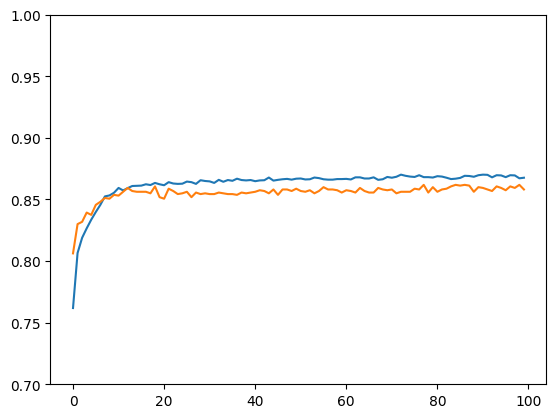

In [151]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(.7,1)

(0.2, 0.9)

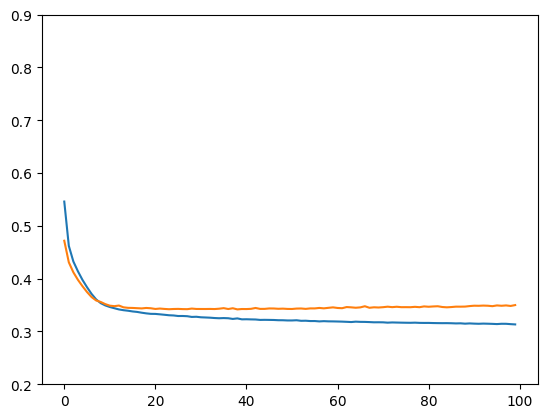

In [150]:
plt.plot((history.history['loss']))
plt.plot((history.history['val_loss']))
plt.ylim(0.2,.9)